_ ___________________________________________________________________________________________________________________________________________________________________________________
|                                                                                                                                                                                    |
|   En este apartado analizaremos --> ¿Cuál es el impacto económico de los incendios forestales en términos de pérdida de metros cuadrados y recursos utilizados para la extinción?  |
|____________________________________________________________________________________________________________________________________________________________________________________|

In [7]:
import pandas as pd


# Carga el archivo CSV
archivo_csv = "../data/Incendios-Forestales-2021.csv"
datos = pd.read_csv(archivo_csv)

# Define la constante de gasto total
gasto_total = 6786000  # 6,786,000 pesos mexicanos

# Itera sobre todas las filas y calcular el gasto por metro cuadrado
gastos_por_metro_cuadrado = []
for metros_cuadrados in datos['Metros Cuadrados']:
    gasto_por_metro_cuadrado = gasto_total / metros_cuadrados
    gastos_por_metro_cuadrado.append(gasto_por_metro_cuadrado)

# Agrega la lista de gastos por metro cuadrado como una nueva columna
datos['Gasto por metro cuadrado (DOP)'] = gastos_por_metro_cuadrado

# Guarda los datos actualizados en un nuevo archivo CSV
datos.to_csv("datos_actualizados.csv", index=False)

# Imprime los primeros registros para verificar
print(datos)


     Unnamed: 0  no.      Municipio      Provincia Mes de origen   \
0             0    1     Pedernales     Pedernales          Enero   
1             1    2  Pedro Santana     Elías Piña          Enero   
2             2    3      Constanza        La Vega          Enero   
3             3    4         SAJOMA       Santiago          Enero   
4             4    5        La Vega        La Vega          Enero   
..          ...  ...            ...            ...            ...   
245         245  246  Restauracion         Dajabon      Diciembre   
246         246  247        Moncion   Stgo. Rguez.      Diciembre   
247         247  248       Sabaneta   Stgo. Rguez.      Diciembre   
248         248  249        Moncion   Stgo. Rguez.      Diciembre   
249         249  250          Veron  La Altagracia      Diciembre   

     Dia de origen Mes de extincion  Dia extincion           Causas  \
0                5            Enero              7      Desconocida   
1               13           

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV
archivo_csv = "../data/Incendios-Forestales-2021.csv"
datos = pd.read_csv(archivo_csv)

# Define la constante de gasto total
gasto_total = 6786000  # 6,786,000 pesos dominicanos

# Calcula el gasto por metro cuadrado para cada fila
datos['Gasto por metro cuadrado (DOP)'] = gasto_total / datos['Metros Cuadrados']

# Agrupa los datos por provincia y calcular el promedio del gasto por metro cuadrado
gasto_promedio_por_provincia = datos.groupby('Provincia')['Gasto por metro cuadrado (DOP)'].mean()

# Ordena los valores para identificar las provincias con el mayor gasto por metro cuadrado
provincias_con_mayor_gasto = gasto_promedio_por_provincia.sort_values(ascending=False)

# Obtiene los metros cuadrados para cada provincia
metros_cuadrados_por_provincia = datos.groupby('Provincia')['Metros Cuadrados'].sum()

# Modifica el índice para incluir los metros cuadrados junto al nombre de la provincia
provincias_con_mayor_gasto.index = provincias_con_mayor_gasto.index + ' (' + metros_cuadrados_por_provincia.astype(str) + ' m^2)'

# Imprime el resultado
print("Provincias con el mayor gasto por metro cuadrado:")
print(provincias_con_mayor_gasto)


Provincias con el mayor gasto por metro cuadrado:
La Vega (105009.6 m^2)           1913.960784
Stgo. Rguez. (403060.8 m^2)       624.691119
Santiago (31485902.4 m^2)         561.760221
Dajabon (69168.0 m^2)             532.317458
Elías Piña (468456.0 m^2)         326.859990
Azua (374764.8 m^2)               278.524482
San Cristobal (62880.0 m^2)       269.799618
Mons. Nouel (405576.0 m^2)        224.833015
San Juan (12937560.0 m^2)         133.579887
Ocoa (56592.0 m^2)                128.904262
Independencia (1050724.8 m^2)      98.108952
Pedernales (274156.8 m^2)          97.186532
La Altagracia (93062.4 m^2)        14.485886
Name: Gasto por metro cuadrado (DOP), dtype: float64


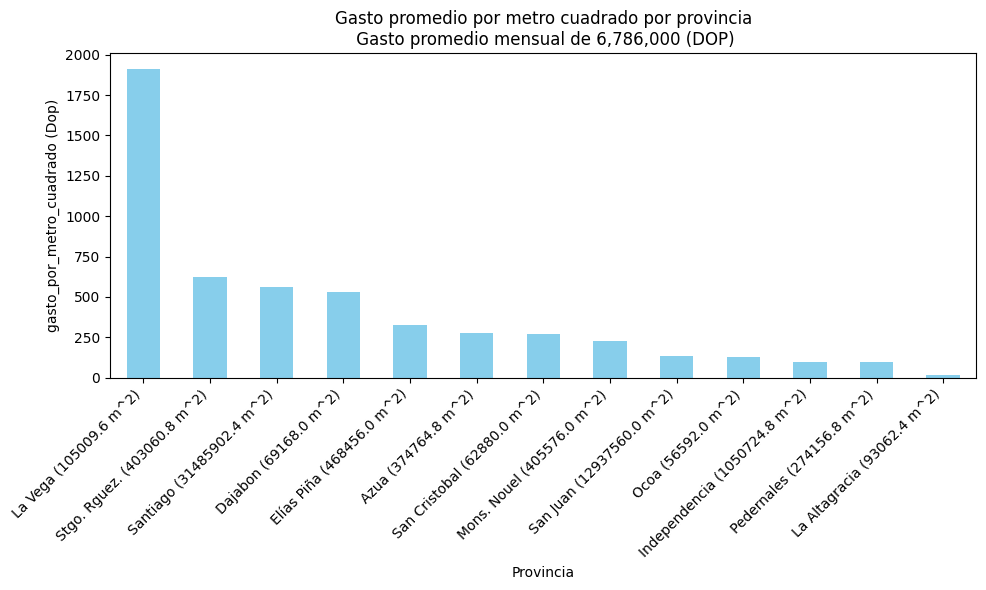

In [10]:
plt.figure(figsize=(10, 6))
provincias_con_mayor_gasto.plot(kind='bar', color='skyblue')
plt.title('Gasto promedio por metro cuadrado por provincia\n Gasto promedio mensual de 6,786,000 (DOP)')
plt.xlabel('Provincia')
plt.ylabel('gasto_por_metro_cuadrado (Dop)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
 

# Agrupa los datos por provincia y causa de incendio, y contar la frecuencia
causas_por_provincia = datos.groupby(['Provincia', 'Causas'])['Causas'].count()

# Encuentra la causa más común por provincia
causas_principales_por_provincia = causas_por_provincia.groupby(level=0).idxmax().reset_index()

# Imprime el resultado
print("Principales causas de incendios por provincia:")
print(causas_principales_por_provincia)


Principales causas de incendios por provincia:
        Provincia                        Causas
0            Azua            (Azua, Caminantes)
1         Dajabon         (Dajabon, Conuquismo)
2      Elías Piña      (Elías Piña, Conuquismo)
3   Independencia   (Independencia, Conuquismo)
4   La Altagracia  (La Altagracia, Desconocida)
5         La Vega         (La Vega, Conuquismo)
6     Mons. Nouel    (Mons. Nouel, Desconocida)
7            Ocoa            (Ocoa, Conuquismo)
8      Pedernales      (Pedernales, Carboneros)
9   San Cristobal   (San Cristobal, Conuquismo)
10       San Juan        (San Juan, Conuquismo)
11       Santiago       (Santiago, Desconocida)
12   Stgo. Rguez.   (Stgo. Rguez., Desconocida)


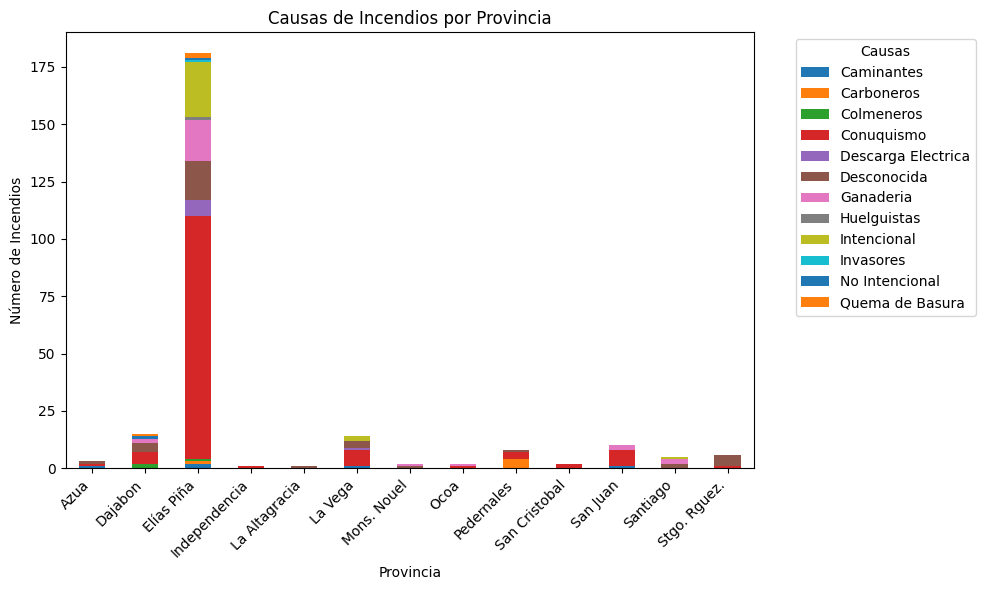

In [20]:

# Contar la frecuencia de cada causa de incendio por provincia
causas_por_provincia = datos.groupby(['Provincia', 'Causas']).size().unstack(fill_value=0)

# Graficar
causas_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Provincia')
plt.ylabel('Número de Incendios')
plt.title('Causas de Incendios por Provincia')
plt.legend(title='Causas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()